# Titanic: Machine Learning from Disaster

**The sinking of the Titanic is one of the most infamous shipwrecks in history.**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook,I build a predictive model that answers the question: “what sorts of people were more likely to survive?”, using passenger data such as name, age, gender, socio-economic class, etc.

## Overview
* Import Libraries
* Understanding the Data
    * Missing values
    * Distribution shapes
* Data Cleaning and Exploration
    * Missing data: impute or remove
    * Correlations: amongst features and with survivability
* Feature Engineering
    * 

## Import libraries
---

In [970]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation and plotting tools
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/test.csv
./data/train.csv


## Understanding the Data
---
First, import the datasets for training and testing. 

In [971]:
train_df = pd.read_csv('./data/train.csv')#'/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('./data/test.csv')#'/kaggle/input/titanic/test.csv')

Let's take a quick look at both dataframes to identify the data types, and check for any missing data.

In [972]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [973]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [974]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values
**Training data**
* Age - 177 / 891 
* Cabin - 687 / 891 
* Embarked - 2 / 891 

**Testing data**
* Age - 86 / 418 
* Cabin - 327 / 418 
* Fare - 1 / 418 

### Distribution shapes

In [975]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [976]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The distributions of properties in the training and testing sets are well matched. Initially, we can see that;
* the overall likelihood for survival is 38.4%.
* the majority of passengers travelled in 2nd or 3rd class, and were younger than 30 years old. 
* The range of Fares is broad and its distribution is centered toward the lower values. 

After we finish exploring the data and before training our model, we will want to scale each feature to bring them within a similar range of values.

To get a better feel for the population, let's visualise these distributions, including the categorical features. 

Some features, specifically Name, Cabin, Ticket, and PassengerId are going to need to processing before we can determine whether there is any useful information that can be extracted from them.


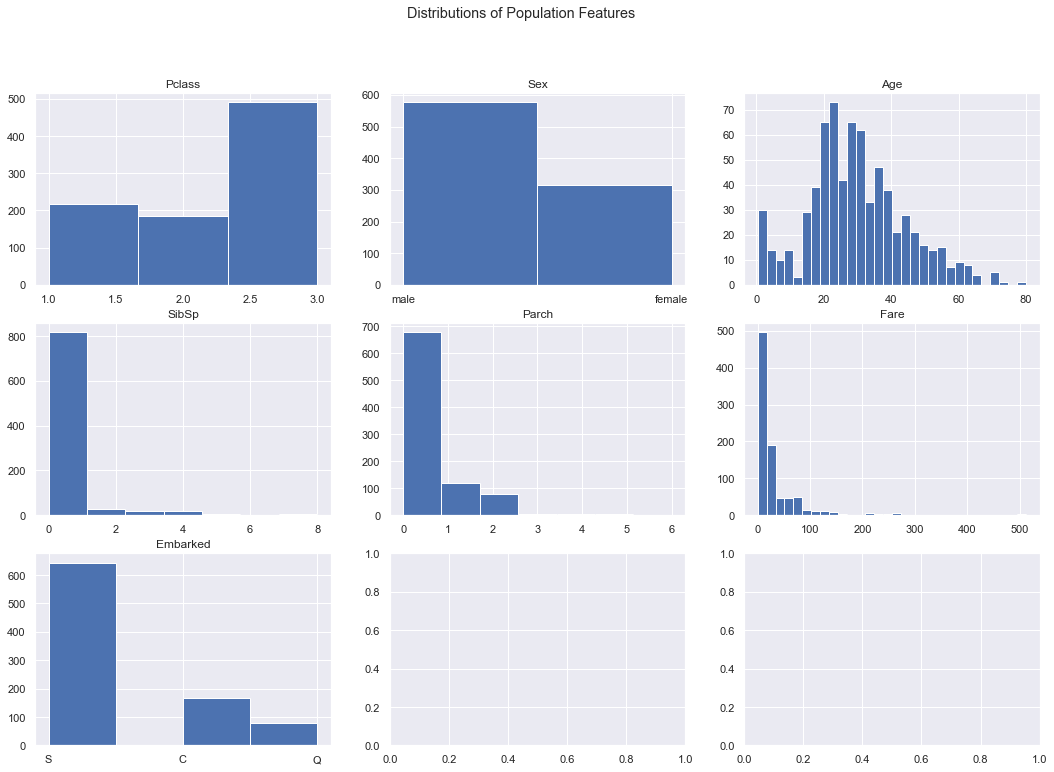

In [977]:
nc, nr = 3, 3
fig, axes = plt.subplots(ncols = nc, nrows = nr, figsize=(18, 12))
#sns.histplot(ax = axes[0,0], data = train_df, x = 'Age')
fig.suptitle('Distributions of Population Features')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']#,'PassengerId','Cabin', 'Survived','Name','Ticket'
 
for ax, feature in zip(axes.flatten(), features):
    bins = min(len(train_df[feature].unique()), 30)
    train_df[feature].hist(ax = ax, bins = bins)
    ax.set(title=feature)

* Approximately half of all passengers travelled in third class, with the other half split between first and second class.
* Approximately 2/3 of passengers were male.
* The majority of passengers were aged between their late teens and late 30's.
* The majority of passengers embarked at Southampton (S).
* Most passengers travelled alone.
* The distribution of fares is heavily positively skewed, most passengers paid a minimum fare.
# ??
For logistic regression, asymmetric distrbutions are not an issue

Before moving on, let's consider the other four features.

In [978]:
train_df[train_df.Cabin.notna()][['PassengerId','Ticket','Name','Cabin']].head(10)

,PassengerId,Ticket,Name,Cabin
1,2,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
3,4,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
6,7,17463,"McCarthy, Mr. Timothy J",E46
10,11,PP 9549,"Sandstrom, Miss. Marguerite Rut",G6
11,12,113783,"Bonnell, Miss. Elizabeth",C103
21,22,248698,"Beesley, Mr. Lawrence",D56
23,24,113788,"Sloper, Mr. William Thompson",A6
27,28,19950,"Fortune, Mr. Charles Alexander",C23 C25 C27
31,32,PC 17569,"Spencer, Mrs. William Augustus (Marie Eugenie)",B78
52,53,PC 17572,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",D33


We see that 
* PassengerId is unlikely to be useful, seems to be just a unique ID for each passenger.
* Some tickets are numeric, others have a letter prefix.
* The names include the persons title, which may be useful if some indicate information beyond sex and age (i.e. doctors or military personnel).
* Cabins include a letter prefix (this indicates deck), and some passengers are assigned multiple cabins.

Fraction PassengerID unique:  1.0
Fraction Ticket unique:   0.6139169472502806
Fraction Ticket numeric:  0.7418630751964085


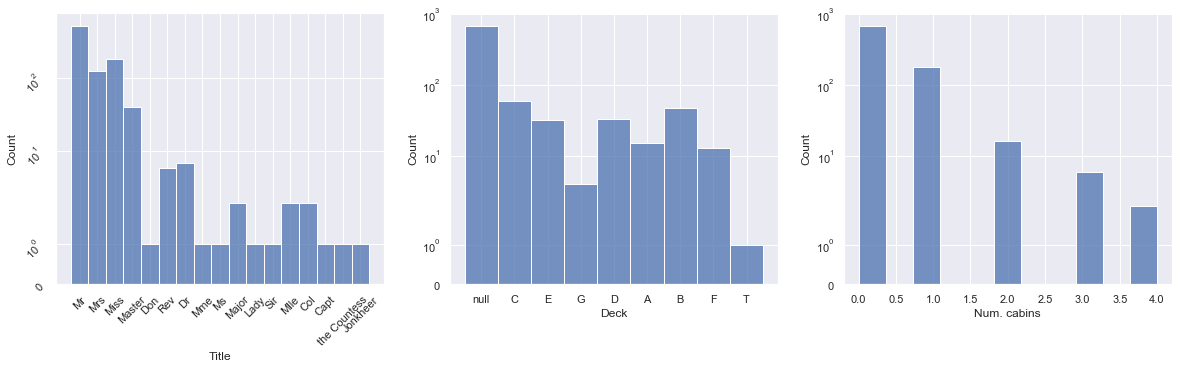

In [979]:
print('Fraction PassengerID unique: ', train_df.PassengerId.nunique() / len(train_df))
print('Fraction Ticket unique:  ', train_df.Ticket.apply(lambda x: True if len(train_df[train_df.Ticket == x]) == 1 else False).sum() / len(train_df))
print('Fraction Ticket numeric: ', len(train_df[train_df.Ticket.str.isnumeric()]) / len(train_df))

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5))
sns.histplot(train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()), ax = ax[0])
sns.histplot(train_df.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'null'), ax = ax[1])
sns.histplot(train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))), ax = ax[2])
ax[0].tick_params(labelrotation = 45)
ax[0].set_xlabel('Title')
ax[1].set_xlabel('Deck')
ax[2].set_xlabel('Num. cabins')
ax[0].set_yscale('symlog')
ax[1].set_yscale('symlog')
ax[2].set_yscale('symlog')

We see that
* All passengers are assigned a unique PassengerId, so this feature will not be useful
* Approx. 40% of passengers share a ticket identifier
* Approx 75% of passengers have a non-numeric ticket identifier.
* Most passengers have title "Mr", "Mrs", "Miss", or "Master". This information might already be contained in Sex, Age, and SibSp. It might be interesting to investigate titles such as "Dr" or "Major", but < 10 passengers have these titles
* Decks are identified by letters A-G. One passenger has deck "T", which we should check. 
* Most passengers are assigned 0 or 1 cabins, though some have up to 4.

We will use this information to do some early feature engineering. We will
* Create "Cabin_letter" and "Num_cabins" features, and drop the Cabin feature.
* Create a "Title" feature, and drop the Name feature
* Create "Ticket_unique" and "Ticket_numeric" features, and drop the Ticket feature


In [980]:
# Which passenger has deck assignment "T"?
train_df[train_df.Cabin.notna() & (train_df.Cabin.str[0] == 'T')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [981]:
# Does he share a ticket with anybody?
train_df[train_df.Ticket == "113784"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [982]:
# Drop this passenger as an outlier.
train_df.drop([339], inplace = True)

In [983]:
    train_df['Ticket_unique'] = train_df.Ticket.apply(lambda x: True if len(train_df[train_df.Ticket == x]) == 1 else False)
    train_df['Ticket_numeric'] = train_df.Ticket.apply(lambda x: True if x.isnumeric() else False)
    # Group into common titles. Unusual titles can all be grouped as "Other"
    common_titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
    train_df['Title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip() if x.split(',')[1].split('.')[0].strip() in common_titles else "Other")
    # Group by cabin letter (deck). If multiple cabins are assigned, use the first. If Cabin is null, set "U" for "Unknown"
    train_df['Cabin_letter'] = train_df.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'U')
    train_df['Num_cabins'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
    train_df.drop(columns = ['Name','Cabin','Ticket'], inplace = True)

## Data Cleaning and Exploration
---

### Missing data: impute or remove

Let's deal with the missing values for Age, Embarked, and Fare, as we have already replaced the missing Cabin values.

Let's check whether there is any notable differences between the groups of passengers with and without their Age recorded.

In [984]:
df1 = train_df[train_df.Age.isna()].describe().loc[['mean','std']].rename(index = {'mean':'mean_isna', 'std':'std_isna'})
df2 = train_df[train_df.Age.notna()].describe().loc[['mean','std']].rename(index = {'mean':'mean_notna', 'std':'std_notna'})
pd.concat((df1,df2))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Num_cabins
mean_isna,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.112994
std_isna,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.334903
mean_notna,448.734923,0.406732,2.238429,29.677658,0.513324,0.431978,34.693384,0.304348
std_notna,259.269449,0.491569,0.837555,14.525365,0.930238,0.853735,52.956070,0.581741


On average, passengers without an Age recorded are less likely to survive, pay a lower Fare, and stay in lower classes. 

This indicates that the Age values are missing at random (MAR), i.e., not correlated with the passengers Age, but perhaps with their Pclass. 

Let's check whether there is a difference in the distribution of Age between passengers grouped by Pclass and Sex.

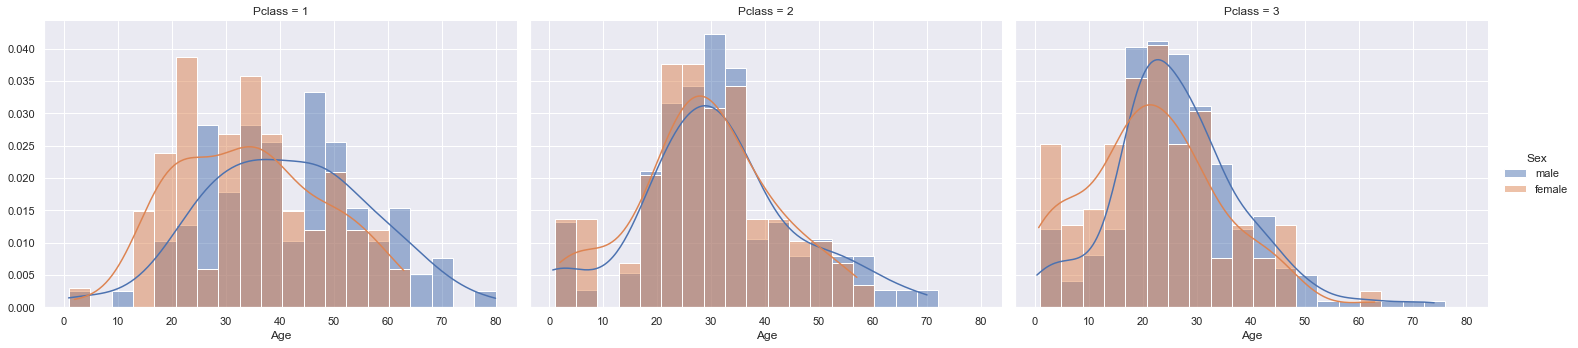

In [985]:
g = sns.FacetGrid(train_df, col = 'Pclass', hue = 'Sex', height = 5, aspect = 1.4)
g.map_dataframe(sns.histplot, 'Age', kde = True, stat = 'density', alpha = 0.5, bins = 20, binrange = (1,80))
g.add_legend()

We see that
* In each Pclass, the distribution of Age amongst females is centered toward younger values compared to males, particularly in Pclass = 1. 
* The distribution of Age in Pclass = 2, 3 are similar, with a slightly younger mean in Pclass = 3.
* The only demographic with a distribution of Age significantly different from the others is males in Pclass = 1.

Let's check the 

In [986]:
d1 = train_df[train_df.Age.isna()].rename(columns = {'PassengerId':'%Total Age isna'}).groupby(['Pclass','Sex'])['%Total Age isna'].count() / len(train_df[train_df.Age.isna()])
d2 = train_df[train_df.Age.notna()].rename(columns = {'PassengerId':'%Total Age notna'}).groupby(['Pclass','Sex'])['%Total Age notna'].count() / len(train_df[train_df.Age.notna()])
pd.concat((d1,d2), axis = 1)

%Total Age isna  %Total Age notna
Pclass Sex                                      
1      female         0.050847          0.119215
       male           0.118644          0.140252
2      female         0.011299          0.103787
       male           0.050847          0.138850
3      female         0.237288          0.143058
       male           0.531073          0.354839

We see that, compared to passengers with a recorded Age, 
* Passengers with null Age are less likely to be in Pclass = 1, much less likely to be in Pclass = 2 and much more likely to be in Pclass = 3
* This difference is more prominent for female passengers

Rather than dropping the Age column, we will impute the missing values based on their Pclass and Sex (Consider KNN imputation?).

For the time being, we will;
* drop the entries with null values for Embarked and Fare, as they are very few.
* fill the null Age values with random numbers drawn from the entries with recorded Age values and matching Pclass and Sex.

In [987]:
import random
# drop entries with missing embarked value
train_df = train_df[train_df.Embarked.notna()]
###test_df = test_df[test_df.Fare.notna()]

# fill null Age values with random numbers drawn from existing distributions
groups = [(s,p) for s in train_df.Sex.unique() for p in train_df.Pclass.unique()]
rand_age = []
for s,p in groups:
    n_null = len(train_df[train_df.Age.isna() & (train_df.Sex == s) & (train_df.Pclass == p)])
    rand_age += random.choices(train_df[train_df.Age.notna() & (train_df.Sex == s) & (train_df.Pclass == p)].Age.astype(int).to_list(), k = n_null)
# fill null values for Age
train_df.loc[pd.isna(train_df.Age), 'Age'] = rand_age

### Correlations: amongst features and with survivability

In [988]:
train_df.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Ticket_unique', 'Ticket_numeric', 'Title',
       'Cabin_letter', 'Num_cabins'],
      dtype='object')

Text(0.5, 0.98, '')

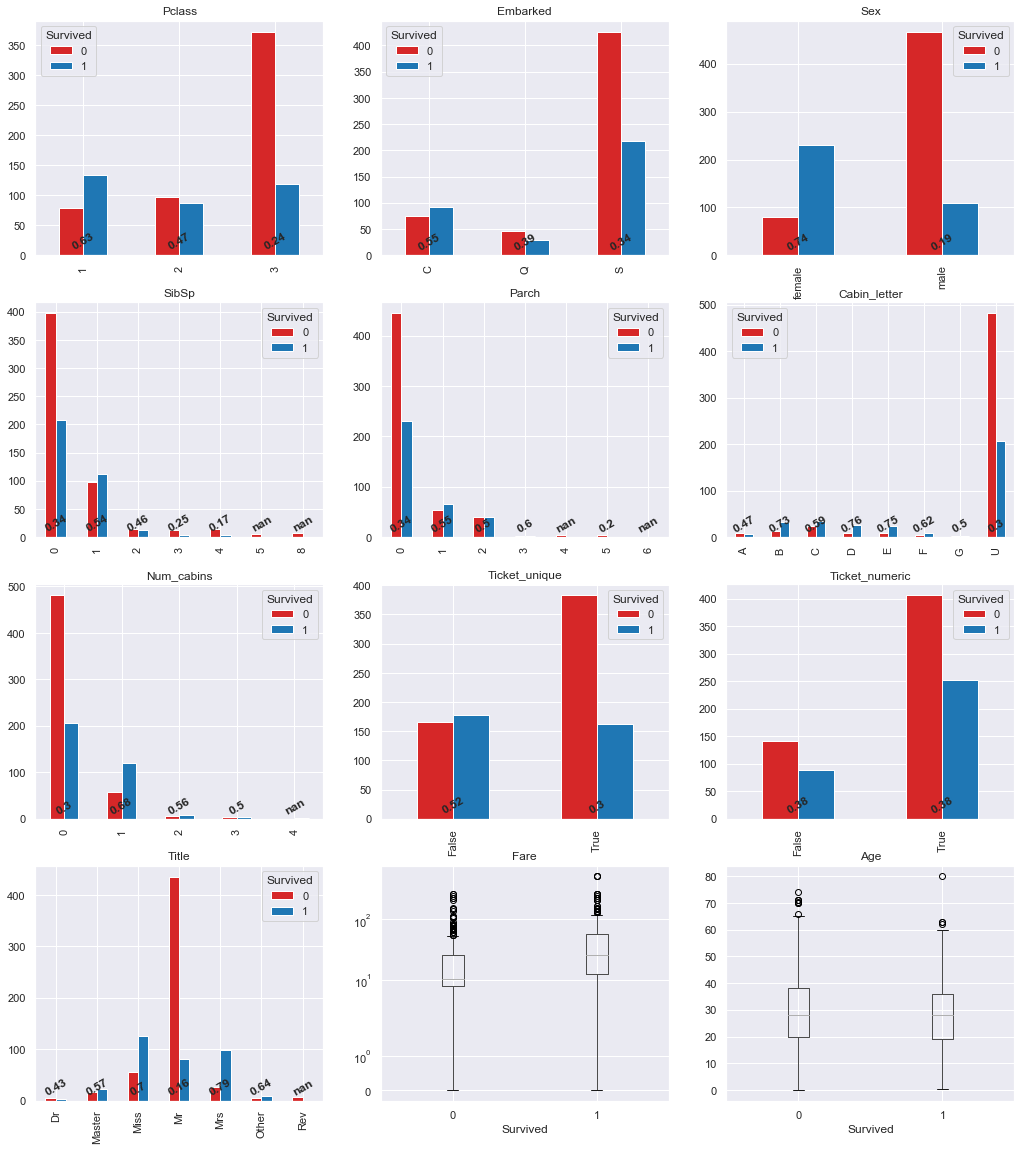

In [990]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (17,20))

features = ['Pclass','Embarked','Sex','SibSp','Parch','Cabin_letter','Num_cabins','Ticket_unique','Ticket_numeric','Title']
for ax, feature in zip(axes.flatten(), features):
    d = train_df.groupby([feature,'Survived'])['Fare'].count().unstack()
    bp = d.plot(ax = ax, kind='bar', color = ['tab:red','tab:blue'])
    bp.set_title(feature)
    bp.set_xlabel(None)
    xticks = bp.get_xticks()
    # Print survival rate on plot
    for i,r in enumerate(d.iterrows()):
        surv = r[1][1]
        die = r[1][0]
        bp.text(xticks[i], 10, round(surv/(surv+die),2), ha = 'center', weight = 'bold', rotation = 30)

for i, feature in enumerate(['Fare','Age']):
    train_df.boxplot(ax = axes[3,i+1], column=feature,by='Survived')

axes[3,1].set_yscale('symlog')

fig.suptitle(None)

Correlated features: 
* Title : Age, Sex, SibSp?
* Ticket_unique : SibSp, Parch?
* Num_cabins : SibSp, Parch?
Each of the features Pclass, Embarked, and Sex, divides the population into groups with significantly different survival rates.


## Feature Engineering

For Age and Fare, precise information about the exact value for each passenger is unlikely to be a good predictor of survivability, we can instead bin the entries by sensible ranges of values.

Let's check how the age distributions of passengers with different survival outcomes compare. We'll also separate by sex.

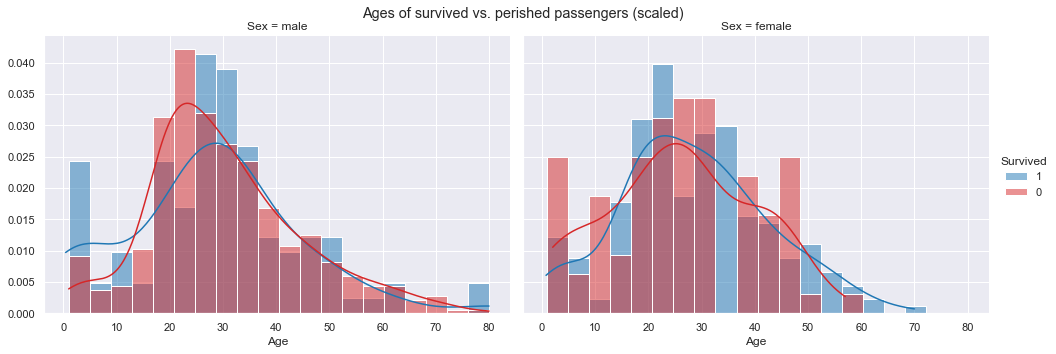

In [797]:
pal = {0: 'tab:red', 1: 'tab:blue'}
g = sns.FacetGrid(train_df, col = 'Sex', hue = 'Survived', hue_order = [1,0], col_order = ['male','female'], palette = pal, height = 5, aspect = 1.4, dropna = True)
g.map_dataframe(sns.histplot, 'Age', kde = True, stat = 'density', alpha = 0.5, bins = 20, binrange = (1,80))
g.add_legend()
g.fig.suptitle('Ages of survived vs. perished passengers (scaled)')
g.fig.subplots_adjust(top=0.9)

# The code above replaces the commented out code below. Keeping it here in case any issues with seaborn updates.
#fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (18,5))
## Separate dataframes for convenvience
#df_died_m = train_df[(train_df.Survived == 0) & (train_df.Sex == 'male')].copy()
#df_surv_m = train_df[train_df.Survived == 1 & (train_df.Sex == 'male')].copy()
#df_died_f = train_df[(train_df.Survived == 0) & (train_df.Sex == 'female')].copy()
#df_surv_f = train_df[train_df.Survived == 1 & (train_df.Sex == 'female')].copy()
## Plot density histograms, force same bin widths
#df_surv_m.Age.hist(ax = ax[0], alpha = 0.5, bins = 20, range = (1,80), density = True, label = 'Survived')
#df_died_m.Age.hist(ax = ax[0], alpha = 0.5, bins = 20, range = (1,80), density = True, label = 'Perished', color = 'red')
#df_surv_f.Age.hist(ax = ax[1], alpha = 0.5, bins = 20, range = (1,80), density = True, label = 'Survived')
#df_died_f.Age.hist(ax = ax[1], alpha = 0.5, bins = 20, range = (1,80), density = True, label = 'Perished', color = 'red')
#ax[0].legend()
#ax[1].legend()
#df_surv_m.Age.plot.density(ax = ax[0], color = 'blue')
#df_died_m.Age.plot.density(ax = ax[0], color = 'red')
#df_surv_f.Age.plot.density(ax = ax[1], color = 'blue')
#df_died_f.Age.plot.density(ax = ax[1], color = 'red')
#fig.suptitle('Ages of survived vs. perished passengers (scaled)')
#ax[0].set_xlim([-5,85])
#ax[1].set_xlim([-5,85])
#ax[0].set_title('Male')
#ax[1].set_title('Female')

* The age distributions between the two groups of passengers are somewhat similar, though 
* younger male passengers were typically ***more*** likely to survive than males aged > 15 y.o., whereas
* younger female passengers were typically ***less*** likely to survive than females aged > 15 y.o.

21-25    158
26-30    132
16-20    124
31-35    108
41-50    102
36-40     81
>50       73
0-5       58
6-10      27
11-15     26
Name: Age, dtype: int64


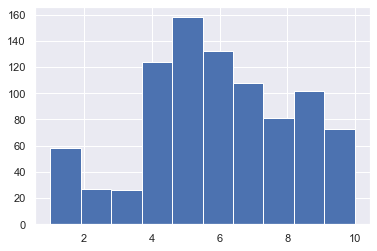

In [798]:
cut_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-50','>50']
cut_bins = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100])
print(pd.cut(train_df.Age, bins = cut_bins, labels = cut_labels, include_lowest = True).value_counts())
train_df.loc[:,'Age_binned'] = train_df.Age.apply(lambda x : (x <= cut_bins).argmax())
#train_df.drop(columns = ['Fare'], inplace = True)
train_df.Age_binned.hist()

7.5-10    249
26-35     136
10-15     122
51-100    105
16-25      99
1-7.5      72
>100       53
36-50      38
0          15
Name: Fare, dtype: int64


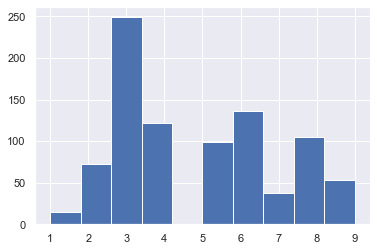

In [799]:
cut_labels = ['0', '1-7.5','7.5-10', '10-15', '16-25','26-35','36-50','51-100','>100']
cut_bins = np.array([-2, 0, 7.5, 10, 15, 25, 35, 50, 100, 1000])
print(pd.cut(train_df.Fare, bins = cut_bins, labels = cut_labels).value_counts())
train_df.loc[:,'Fare_binned'] = train_df.Fare.apply(lambda x : (x <= cut_bins).argmax())
#train_df.drop(columns = ['Fare'], inplace = True)
train_df.Fare_binned.hist()

In [800]:
train_df[train_df.Age.isna()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_binned,Fare_binned
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [801]:
train_df[train_df.Cabin.isna()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_binned,Fare_binned
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Null values for Age or Cabin is certainly correlated in some way with survivability. Passengers without a recorded Age or Cabin both, on average, are similar in the lower fare that they pay, and lesser class that they board in. 

It is reasonable to expect that the information about the survivability of passengers with null Age or Cabin might be preserved in other features. That means that we could drop the Age and Cabin columns without compromising the predictive power of our model. In fact, in may be beneficial as a way of emphasising the importance of the remaining features and their correlation with survivability.  

We can check the validity of this assumption by calculated the weighted mean of the survivability of the 2nd and 3rd class passengers.
First calculate the weight need to achieve the mean Pclass = 2.64, i.e. $2.64 = w \times 2 + (1 - w) \times 3$

In [802]:
nullcabin_pclass_mean = train_df[train_df.Cabin.isna()].Pclass.mean()
weight = (nullcabin_pclass_mean - 3.0) / (2.0 - 3.0)
print(weight, weight * 2.0 + (1 - weight) * 3.0)

nan nan


We see that $w = 0.36$. Then, checking the weighted mean of the survival rates;

In [803]:
pclass3_surv = train_df[(train_df.Pclass == 3)].Survived.mean()
pclass2_surv = train_df[(train_df.Pclass == 2)].Survived.mean()
weightedmean_surv = weight * pclass2_surv + (1 - weight) * pclass3_surv
print(weightedmean_surv)

nan


Which is pretty close to the survival rate of passengers without an assigned cabin (0.3)

To be safe we could drop the Cabin column, but there is clearly a correlation with survivability and the null-values, so we'll see of there's other useful information that we can extract first.

The majority of cabins also begin with a letter A-G. We'll extract that information and take a look

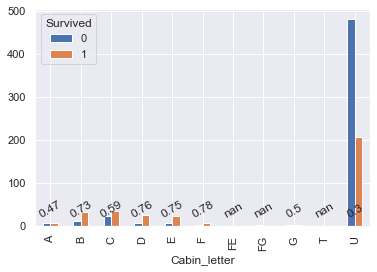

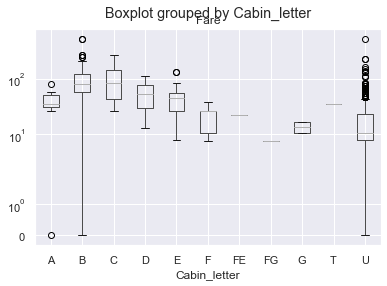

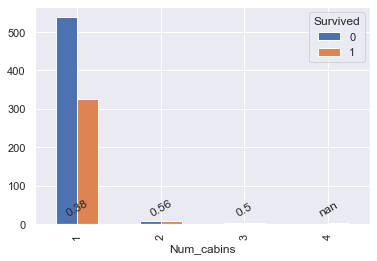

In [804]:
# Letter of cabin assignment. "U" i.e. unknown if null, or if multiple cabins with different letters.
# Include F for cabin assignments with leading F, e.g. "F G73" -> "FG"
train_df['Cabin_letter'] = train_df.Cabin.apply(lambda x: str(x)[0:3:2] if str(x)[0:2] == 'F '
                                    else ('U' if (pd.isna(x) or len(list(set([c[0] for c in x.split(' ')]))) > 1) else x[0]))
# Number of Cabins assigned
train_df['Num_cabins'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# Plot the survival rate for each cabin letter
d = train_df.groupby(['Cabin_letter','Survived'])['PassengerId'].count().unstack()
bp = d.plot(kind='bar')
xticks = bp.get_xticks()
for i,r in enumerate(d.iterrows()):
    surv = r[1][1]
    die = r[1][0]
    bp.text(xticks[i], 20, round(surv/(surv+die),2), ha = 'center', rotation = 30)

# Plot the distribution of Fares for each cabin letter
ax = train_df.boxplot(column='Fare',by='Cabin_letter')
ax.set_yscale('symlog')

# Plot the survival rate against number of assigned cabins
d = train_df.groupby(['Num_cabins','Survived'])['PassengerId'].count().unstack()
bp = d.plot(kind='bar')
xticks = bp.get_xticks()
for i,r in enumerate(d.iterrows()):
    surv = r[1][1]
    die = r[1][0]
    bp.text(xticks[i], 20, round(surv/(surv+die),2), ha = 'center', rotation = 30)


As we have already seen, the vast majority (77%) of passengers have no assigned cabins and a lower survival rate (0.3).
Those with an assigned cabin seem to have an increased survival rate (around 75% survival) regardless of exact letter, although the statistics are too poor in some cabin groups to say for sure. 

Those without an assigned Cabin ("U"), tend to pay lower Fares, though several outliers do pay higher fares. It seems that much of the survivability information is retained in the Fare value for each passenger, but the number of cabins assigned also affects survival rate (particularly those without a cabin assigned/recorded). 

We'll keep Num_cabins ??and Cabin_letter??.

In [805]:
train_df.drop(columns = ['Cabin'], inplace = True)

Now let's think about the missing age values. First plot the relationship with survivability.

In [806]:

train_df['Age_recorded'] = train_df.Age.apply(lambda x: False if pd.isna(x) else True)
bp = sns.countplot(x = 'Age_recorded', data = train_df, hue = 'Survived')
xticks = bp.get_xticks()
dd = train_df[['Age_recorded','Survived']].value_counts()[True][0]
print(dd)
#for i,r in enumerate(train_df[['Age_recorded','Survived']].value_counts().unstack().iterrows()):
for i,r in enumerate(train_df[['Age_recorded','Survived']].value_counts()):
    #surv = r[1][1]
    #die = r[1][0]
    print(r)
    #surv = r[1]
    #die = r[0]
    #bp.text(xticks[i], 10, round(surv/(surv+die),2), ha = 'center', weight = 'bold', rotation = 30)

ax = train_df.boxplot(column='Age',by='Survived')

AttributeError: 'DataFrame' object has no attribute 'value_counts'

Again, whether or not an age is recorded is correlated with the survival rate. The distributions of ages for the survivors and non-survivors are similar, although the elder passengers (over 60) are less likely to survive overall. 

We'll replace the Age feature with an Age_recorded boolean.


In [494]:
train_df.loc[:,'Age_recorded'] = train_df.Age.apply(lambda x: True if pd.notna(x) else False)
train_df.drop(columns = ['Age'], inplace = True)

That takes care of the entries with null values for Cabin and Age. As there are only 2 entries with null values for Embarked, we'll drop those entries.

In [495]:
train_df = train_df[train_df.Embarked.notna()]

Let's move on to the remaining features. Individual Names are not likely to be a useful indicator, but perhaps it's worthwhile to extract each passengers title (e.g. Ms, Mr, Dr, etc.).

In [496]:
train_df['Title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_df.drop(columns = ['Name'], inplace = True)

Most Ticket entries are entirely numerical, but some have a string prefix, e.g. "SOTON/OQ 392076". We won't dig too deeply into the meaning of the prefixes, but instead will simply add a column identifying
whether a passengers Ticket is numeric or not.

In [497]:
train_df['Ticket_numeric'] = train_df.Ticket.apply(lambda x: 'unknown' if pd.isna(x) else (True if x.isnumeric() else False))
train_df.drop(columns = ['Ticket'], inplace = True)

Now let's take a look at the correlations of the remaining and new features with each other, and with survivability. 
We need to use different methods to look at the correlations in categorial and numerical data, so first we'll split up the data (we'll treat the ordinal variables as categorical).

In [498]:
num_vars = ['PassengerId','SibSp','Parch','Fare','Num_cabins']
cat_vars = ['Pclass','Sex','Embarked','Title','Ticket_numeric','Cabin_letter', 'Age_recorded']

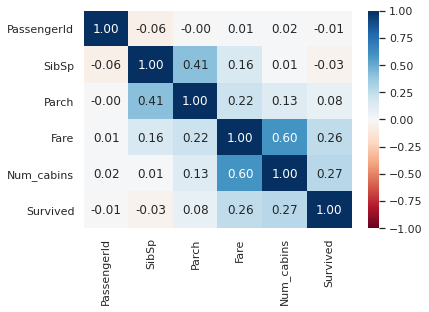

In [499]:
sns.heatmap(train_df[num_vars + ['Survived']].corr(), annot = True, fmt = '1.2f', cmap = 'RdBu', vmin = -1, vmax = 1)

Key points;
* Passenger ID shows little correlation with any other numerical features, we can drop it.
* Weak-moderate positive corr. between SibSp and Parch indicates small percentage of passengers travelling in traditional family group.

In [500]:
train_df['Group_size'] = train_df['Parch'] + train_df['SibSp']
train_df.drop(columns = ['PassengerId','SibSp','Parch'], inplace = True)

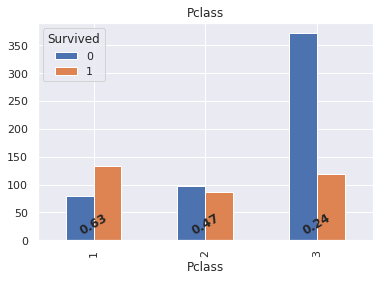

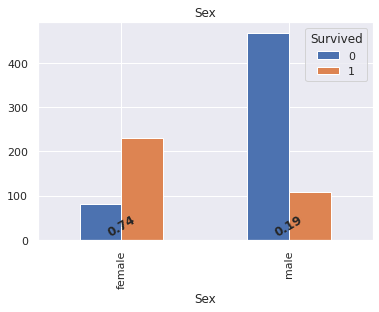

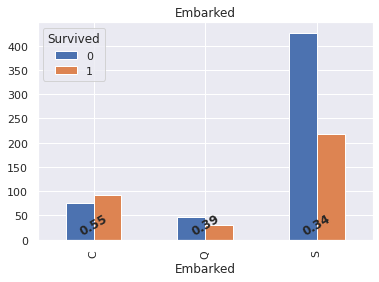

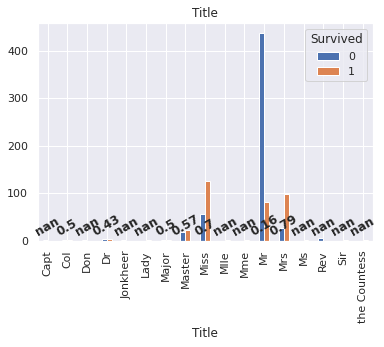

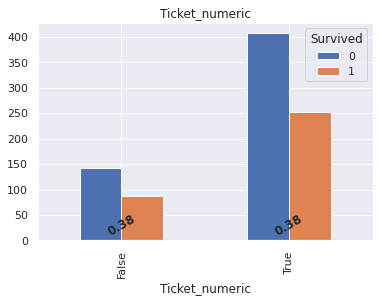

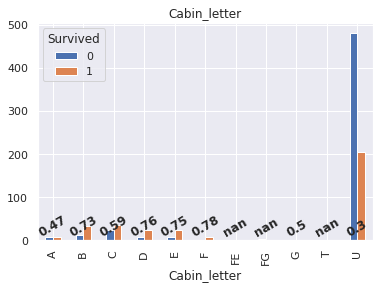

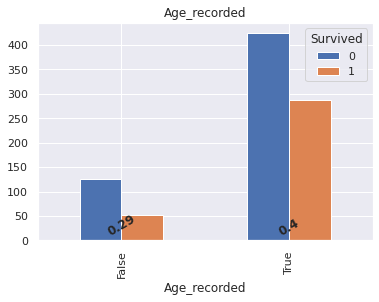

In [501]:
# check correlation between age_recorded and group_size
for var in cat_vars:
    d = train_df.groupby([var,'Survived'])['Fare'].count().unstack()
    bp = d.plot(kind='bar')
    bp.set_title(var)
    xticks = bp.get_xticks()
    for i,r in enumerate(d.iterrows()):
        surv = r[1][1]
        die = r[1][0]
        bp.text(xticks[i], 10, round(surv/(surv+die),2), ha = 'center', weight = 'bold', rotation = 30)

We see that each of the categorical features can divide the population into groups with significantly different survival rates, with
the exception of the Ticket_numeric feauture, which we will drop. The Title feature separates passengers into groups with survival rates that seemingly reflect the other predictors of sex and age, i.e. "Mr" has much lesser chance of survival than "Mrs", but "Master" has much higher survival rate than "Mr". It may be useful to keep this column as we have had to drop the Age feature due to a large proportion of null values. However, the Title feature contains many small groups with poor survival statistics (the three largest groups are Mr., Mrs., and Miss.) It may be best to keep just "Dr, Master, Miss, Mr, Mrs" and the rest can be assigned "Other". 

In [502]:
train_df.drop(columns = ['Ticket_numeric'], inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Sex           889 non-null    object 
 3   Fare          889 non-null    float64
 4   Embarked      889 non-null    object 
 5   Fare_binned   889 non-null    int64  
 6   Cabin_letter  889 non-null    object 
 7   Num_cabins    889 non-null    int64  
 8   Age_recorded  889 non-null    bool   
 9   Title         889 non-null    object 
 10  Group_size    889 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 77.3+ KB


So, our final list of Features to keep for training and prediction are;
Pclass, Sex, Fare, Embarked, Cabin_recorded, Age_recorded, and Group_size (along with Survived, naturally)



# Clean data function
We'll keep track of our cleaning/engineering steps in a single function so that we can start fresh before training the model

In [503]:
import random

def clean_data(df):
    ## Name ##
    # Most common titles
    titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs']
    df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip() if x.split(',')[1].split('.')[0].strip() in titles else "Other")

    ## Cabin ##
    # Number of Cabins assigned
    df['Num_cabins'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

    ## Age ##
    # fill null Age values with random numbers drawn from existing distribution
    n_null = train_df['Age'].isnull().sum()
    rand_age = random.choices(train_df[train_df.Age.notna()].Age.astype(int).to_list(), k = n_null)
    # fill null values for Age
    train_df.loc[pd.isna(train_df.Age), 'Age'] = rand_age

    ## Parch / SibSp ##
    #df['Group_size'] = df['Parch'] + df['SibSp']

    ## Fare ##
    # Bin the fares into sensible ranges
    cut_bins = np.array([-2, 0, 7.5, 10, 15, 25, 35, 50, 100, 1000])
    #df['Fare_binned'] = np.log10(train_df.Fare + 1)#train_df.Fare.apply(lambda x : (x <= cut_bins).argmax())
    df['Fare_binned'] = train_df.Fare.apply(lambda x : (x <= cut_bins).argmax())

    ## Pclass ##
    # Make sure that the Pclass feauture is treated as categorical
    df.Pclass = df.Pclass.astype(str)

    ## Embarked ##
    df = df[df.Embarked.notna()]
    
    drop_cols = ['Cabin','Name','Ticket','PassengerId','Fare']
    df.drop(columns = drop_cols, inplace = True)

    return df

# Model training

In [504]:

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df.loc[:,'train'] = 1
test_df.loc[:,'train'] = 0
test_df.loc[:,'Survived'] = np.nan
df = pd.concat((train_df,test_df))
df = clean_data(df)

dummy_vars = ['Pclass', 'Sex', 'Fare_binned', 'Embarked', 'Num_cabins', 'Age', 'Parch','SibSp','Title','train']
df_dummies = pd.get_dummies(df[dummy_vars])

X_train = df_dummies[df_dummies.train == 1].drop(['train'], axis =1)
X_test = df_dummies[df_dummies.train == 0].drop(['train'], axis =1)

y_train = df[df.train==1].Survived

scale = StandardScaler()
df_dummies_scaled = df_dummies.copy()
df_dummies_scaled[['Parch','SibSp','Fare_binned','Age','Num_cabins']] = scale.fit_transform(df_dummies_scaled[['Parch','SibSp','Fare_binned','Age','Num_cabins']])

X_train_scaled = df_dummies_scaled[df_dummies_scaled.train == 1].drop(['train'], axis =1)
X_test_scaled = df_dummies_scaled[df_dummies_scaled.train == 0].drop(['train'], axis =1)

y_train = df[df.train==1].Survived

#gnb = GaussianNB()
#cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)

#lr = LogisticRegression(max_iter = 2000)
#cv = cross_val_score(lr,X_train,y_train,cv=5)

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)

print(cv)
print(cv.mean())



/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

[0.85393258 0.82022472 0.82022472 0.80898876 0.8700565 ]
0.8346854567383989


# To Do
Bin Fares/Ages/etc? Normalise non-normal?

# Ideas to explore
